In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from util import *
from algorithms import *
import scipy
from tqdm import tqdm
import ot

In [4]:
tau = 1e-6
#times_MALA = np.load('results/image_ex/denoising/MALA/reg_par_5_data_par_1.0_tau_'+str(tau)+'_computation_times.npy')
times_MYULA = np.load('results/image_ex/deconv_kernelsize_5/MYULA/barbara/reg_par_20_data_par_10000.0_ld_0.0001_tau_1e-06_computation_times.npy')
#times_MYULA = np.load('results/image_ex/denoising/MYULA/barbara/reg_par_30_data_par_399.99999999999994_ld_0.0001_tau_1e-06_computation_times.npy')
times_grad = np.load('results/image_ex/deconv_kernelsize_5/grad_subgrad/barbara/reg_par_20_data_par_10000.0_tau_'+str(tau)+'_computation_times.npy')
times_prox = np.load('results/image_ex/deconv_kernelsize_5/prox_subgrad/barbara/reg_par_20_data_par_10000.0_tau_'+str(tau)+'_computation_times.npy')

print(np.sum(times_MYULA)/(np.sum(times_MYULA>0)))
print((np.sum(times_MYULA>0)))
print(np.sum(times_grad)/(np.sum(times_grad>0)))
print(np.sum(times_prox)/(np.sum(times_prox>0)))


43.1350259903272
1500
0.9195996774037679
1.0501665315628053


# TV l2 denoising results

In [5]:
step = 500
maxit = 49500
num = int(maxit//step)
n = 5000


In [6]:
d = 2
sigma = 1
reg_par = 5
data_par = 1/(sigma**2)
m = data_par
L_F = data_par
L_G = reg_par*np.sqrt(d)
K_nrm = 2
y1=-1
y2=1

f = lambda x1,x2: np.exp(-data_par*((x1-y1)**2+(x2-y2)**2)/(2*sigma**2) - reg_par*(np.abs(x1-x2)))

Z = scipy.integrate.dblquad(f, -5, 5, -5, 5)[0]
density = lambda x1,x2: f(x1,x2)/Z



/home/habring/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [7]:
num_bins = 100
bins1_x = np.linspace(-5,5,num_bins+1)
bins1_y = np.linspace(-5,5,num_bins+1)
dx1 = bins1_x[1:]-bins1_x[:-1]
dy1 = bins1_y[1:]-bins1_y[:-1]

gt = np.zeros([num_bins,num_bins])
for i in tqdm(range(num_bins)):
    for j in (range(num_bins)):
        gt[i,j] = scipy.integrate.dblquad(density, bins1_x[i], bins1_x[i+1], bins1_y[j], bins1_y[j+1])[0]
        
hist1 = np.copy(gt)
hist1 /= np.sum(hist1)

gt1 = np.zeros([2,num_bins**2])
b_2d = np.zeros([num_bins,num_bins])
b = np.zeros(num_bins**2)

for i in range(num_bins):
    for j in range(num_bins):
        gt1[1,i*num_bins+j] = (bins1_x[i]+bins1_x[i+1])/2
        gt1[0,i*num_bins+j] = (bins1_y[j]+bins1_y[j+1])/2
        b[i*num_bins+j] = hist1[i,j]
        

100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.55it/s]


In [405]:
fig = plt.figure(figsize=(15,10))

x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(1e-3)+'_iter_'+str(0)+'.npy')

hist_init = np.histogram2d(x[1,:], x[0,:], bins=[bins1_x,bins1_y], density=True)[0]*dx1*dy1

x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(1e-3)+'_iter_'+str(49500)+'.npy')

hist = np.histogram2d(x[1,:], x[0,:], bins=[bins1_x,bins1_y], density=True)[0]*dx1*dy1



<Figure size 1080x720 with 0 Axes>

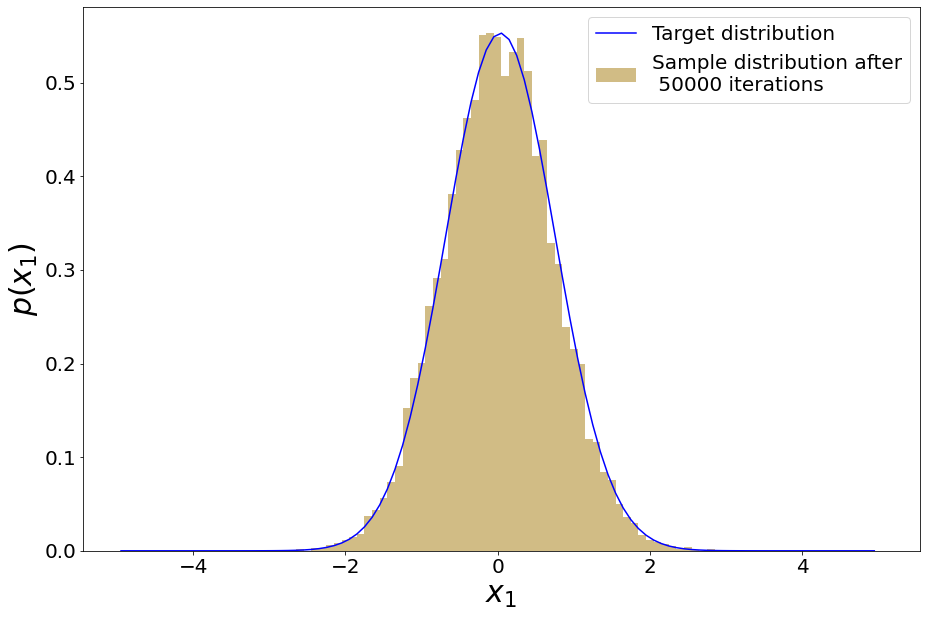

In [406]:
fig = plt.figure(figsize=(15,10))

x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(1e-3)+'_iter_'+str(0)+'.npy')

hist_init = np.histogram(x[0,:], bins=bins1_x, density=True)[0]

x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(1e-3)+'_iter_'+str(49500)+'.npy')
#x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(1e-5)+'_iter_'+str(4000)+'.npy')
#x = np.load('results/2d_ex/l2/MYULA/reg_par_5_data_par_1.0_tau_'+str(1e-5)+'_iter_'+str(4000)+'.npy')

hist = np.histogram(x[0,:], bins=bins1_x, density=True)[0]

#plt.bar((bins1_x[1:]+bins1_x[:-1])/2,hist_init,color=(209/255,188/255,133/255))
plt.bar(bins1_x[1:],hist,width = dx1,color=(209/255,188/255,133/255),align='center',label='Sample distribution after'+'\n'+' 50000 iterations')
plt.plot((bins1_x[1:]+bins1_x[:-1])/2,np.sum(hist1,axis=1)/dx1[0],color='b',label = 'Target distribution')
matplotlib.rcParams.update({'font.size': 20})
plt.xlabel(r'$x_1$',fontsize=30)
plt.ylabel(r'$p(x_1)$',fontsize=30)
plt.legend()
plt.savefig('results/images_paper/reached_distribution_TV_L2.png')

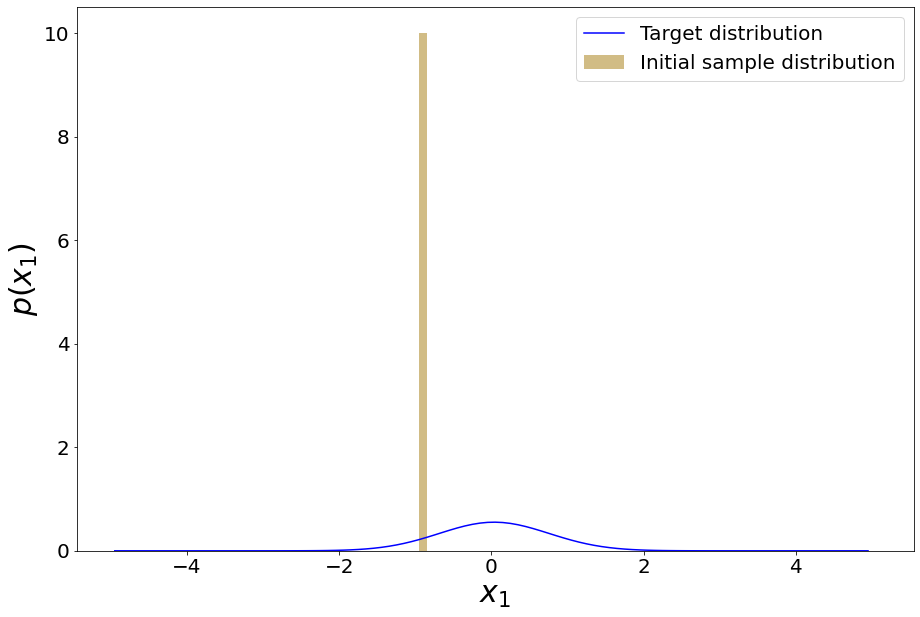

In [407]:
fig = plt.figure(figsize=(15,10))
x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(1e-3)+'_iter_'+str(0)+'.npy')

hist_init = np.histogram(x[0,:], bins=bins1_x, density=True)[0]
hist_init = hist_init

x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(1e-3)+'_iter_'+str(49500)+'.npy')

hist = np.histogram(x[0,:], bins=bins1_x, density=True)[0]
hist = hist

plt.bar(bins1_x[1:],hist_init,width = dx1,color=(209/255,188/255,133/255),label='Initial sample distribution')
plt.plot((bins1_x[1:]+bins1_x[:-1])/2,np.sum(hist1,axis=1)/dx1[0],'b',label = 'Target distribution')
matplotlib.rcParams.update({'font.size': 20})
plt.xlabel(r'$x_1$',fontsize=30)
plt.ylabel(r'$p(x_1)$',fontsize=30)
plt.legend()
plt.savefig('results/images_paper/initial_distribution_TV_L2.png')

# Wasserstein convergence of Prox-sub and Grad-sub

In [408]:
tau_list = [1e-5,1e-4,1e-3,1e-2]
w2 = np.zeros([2,len(tau_list),num+1])
try:
    w2=np.load('results/2d_ex/W2_errors_TV_l2.npy')
except:
    for i in tqdm(range(num+1)):
        for tau_num,tau in enumerate(tau_list):
        
            x = np.load('results/2d_ex/l2/grad_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+'_iter_'+str(i*step)+'.npy')
            x=x[:,0:n]
            a = np.ones((n,)) / n
            M = ot.dist(np.transpose(x), np.transpose(gt1))
            w2[0,tau_num,i] = ot.emd2(a, b, M,numItermax=1e6)
            
            
            x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+'_iter_'+str(i*step)+'.npy')
            x=x[:,0:n]
            a = np.ones((n,)) / n
            M = ot.dist(np.transpose(x), np.transpose(gt1))
            w2[1,tau_num,i] = ot.emd2(a, b, M,numItermax=1e6)

    np.save('results/2d_ex/W2_errors_TV_l2.npy',w2)
    

In [409]:
rates = np.zeros([2,len(tau_list),num+1])
tau_list = [1e-3,1e-4,1e-5]


for i in tqdm(range(num+1)):
    for tau_num,tau in enumerate(tau_list):
        rates[0,tau_num,i] = np.power(1-tau*m,step*i)*w2[0,tau_num,0]+(tau/m)*(2*d*L_F + L_G**2*K_nrm**2)
        rates[1,tau_num,i] = np.power(1-tau*m/2,step*i)*w2[1,tau_num,0]+(tau*2/m)*(2*d*L_F+L_G**2*K_nrm**2)

rate_lim = np.zeros([2,len(tau_list)])
for tau_num,tau in enumerate(tau_list):
    rate_lim[0,tau_num] = (tau/m)*(2*d*L_F + L_G**2*K_nrm**2)
    rate_lim[1,tau_num] = (tau*2/m)*(2*d*L_F+L_G**2*K_nrm**2)
    

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 52180.94it/s]


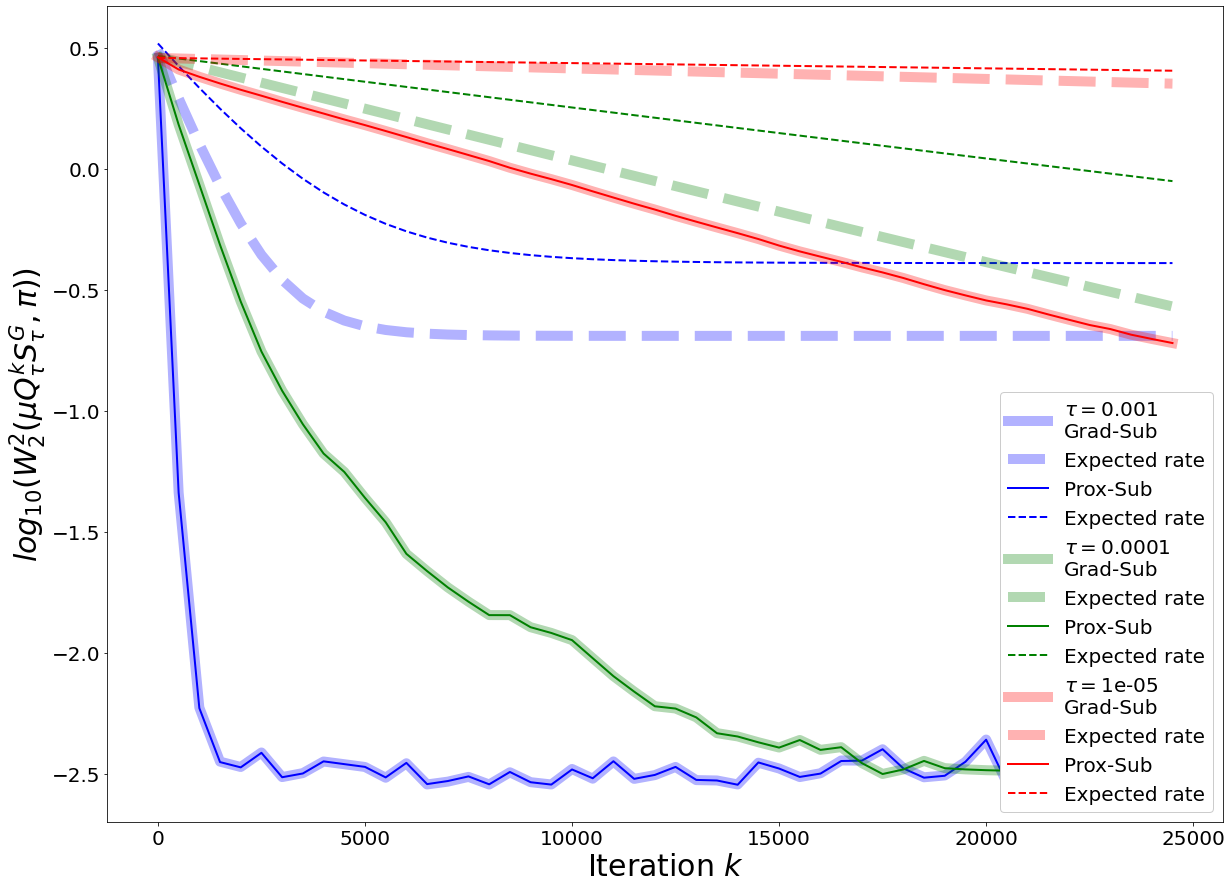

In [410]:

f = plt.figure(figsize=(20,15))
show_n=50
x_axis=np.arange(stop=show_n*step,step=step)

c = ['b', 'g','r' , 'k']


for tau_num,tau in enumerate(tau_list):
    plt.plot(x_axis,np.log10((w2[0,2-tau_num,:show_n])),c[tau_num]+'-',alpha = 0.3,linewidth=10,label=r'$\tau = $'+str(tau)+'\n'+'Grad-Sub')
    plt.plot(x_axis,np.log10(rates[0,tau_num,:show_n]),c[tau_num]+'--',alpha = 0.3,linewidth=10,label='Expected rate')
    #plt.hlines(np.log10(rate_lim[0,tau_num]),x_axis[0],x_axis[-1],color = c[tau_num],linestyles = 'dashed')
    
    plt.plot(x_axis,np.log10((w2[1,2-tau_num,:show_n])),c[tau_num]+'-',linewidth=2,label='Prox-Sub')
    plt.plot(x_axis,np.log10(rates[1,tau_num,:show_n]),c[tau_num]+'--', linewidth=2,label='Expected rate')
    #plt.hlines(np.log10(rate_lim[1,tau_num]),x_axis[0],x_axis[-1],color = c[tau_num])
    
    
    
matplotlib.rcParams.update({'font.size': 20})
plt.xlabel('Iteration $k$',fontsize=30)
plt.ylabel(r'$log_{10}(W^2_2(\mu Q^k_\tau S^G_\tau,\pi))$',fontsize=30)
plt.legend(loc='lower right',framealpha=1)
plt.savefig('results/images_paper/W2_convergence_rates_2d_diff.png')

# Comparison of Prox-sub and Sub

In [426]:
tau_list = [1e-3,1e-4,1e-5]

KL = np.zeros([3,len(tau_list),num+1])
try:
    #KL=np.load('results/2d_ex/W2_errors_TV__l2_subgrad_avg.npy')
    KL=np.load('results/2d_ex/KL_errors_TV_l2_subgrad_proxgrad.npy')
except:
    for i in tqdm(range(num+1)):
        for tau_num,tau in enumerate(tau_list):
            
            x = np.load('results/2d_ex/l2/subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'average_distribution.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            integrand = np.zeros(hist.shape)
            for k in range(integrand.shape[0]):
                for l in range(integrand.shape[1]):
                    if hist1[k,l]<1e-8:
                        integrand[k,l] = 0
                    elif hist[k,l]<1e-8:
                        integrand[k,l] = 0
                    else:
                        integrand[k,l] = hist[k,l]*np.log(hist[k,l]/hist1[k,l])

            KL[0,tau_num,i] = np.sum(integrand)
            
            
            x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'average_distribution.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            integrand = np.zeros(hist.shape)
            for k in range(integrand.shape[0]):
                for l in range(integrand.shape[1]):
                    if hist1[k,l]<1e-8:
                        integrand[k,l] = 0
                    elif hist[k,l]<1e-8:
                        integrand[k,l] = 0
                    else:
                        integrand[k,l] = hist[k,l]*np.log(hist[k,l]/hist1[k,l])

            KL[1,tau_num,i] = np.sum(integrand)
            
            x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            integrand = np.zeros(hist.shape)
            for k in range(integrand.shape[0]):
                for l in range(integrand.shape[1]):
                    if hist1[k,l]<1e-8:
                        integrand[k,l] = 0
                    elif hist[k,l]<1e-8:
                        integrand[k,l] = 0
                    else:
                        integrand[k,l] = hist[k,l]*np.log(hist[k,l]/hist1[k,l])

            KL[2,tau_num,i] = np.sum(integrand)

    np.save('results/2d_ex/KL_errors_TV_l2_subgrad_proxgrad.npy',KL)


100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 18.46it/s]


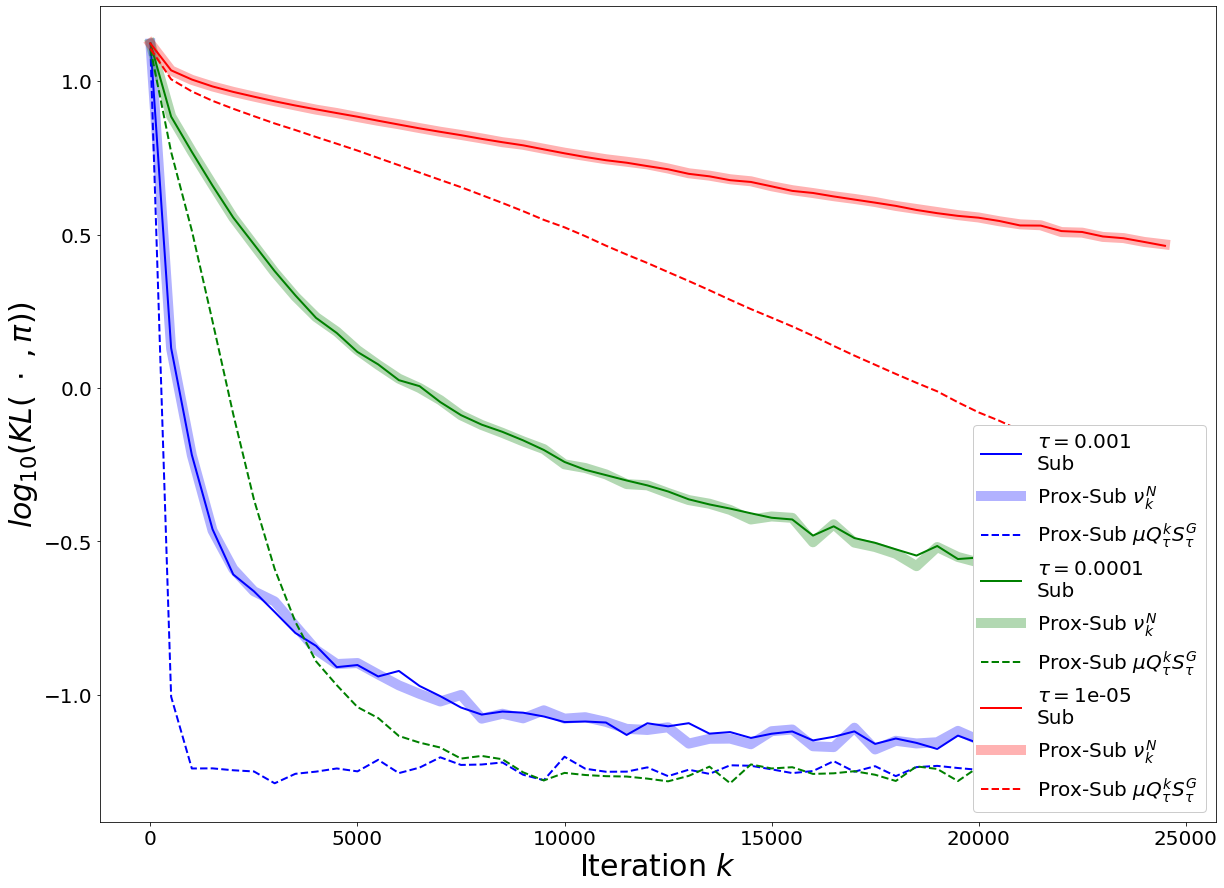

In [433]:

f = plt.figure(figsize=(20,15))
show_n = 50
x_axis=np.arange(stop=show_n*step,step=step)

c = ['b', 'g','r' , 'k']


for tau_num,tau in enumerate(tau_list):
    plt.plot(x_axis,np.log10((KL[0,tau_num,:show_n])),c[tau_num]+'-',linewidth=2,label=r'$\tau = $'+str(tau)+'\n'+'Sub')
    plt.plot(x_axis,np.log10((KL[1,tau_num,:show_n])),c[tau_num]+'-',alpha = 0.3,linewidth=10,label=r'Prox-Sub $\nu_k^N$')
    plt.plot(x_axis,np.log10((KL[2,tau_num,:show_n])),c[tau_num]+'--',linewidth=2,label=r'Prox-Sub $\mu Q^k_\tau S^G_\tau$')
    
    #plt.hlines(np.log10(rate_lim[1,tau_num]),x_axis[0],x_axis[-1],color = c[tau_num])
    
    
matplotlib.rcParams.update({'font.size': 20})
plt.xlabel('Iteration $k$',fontsize=30)
plt.ylabel(r'$log_{10}(KL(\;\cdot\;,\pi))$',fontsize=30)
plt.legend(loc='lower right',framealpha=1)
plt.savefig('results/images_paper/KL_convergence_rates_2d_diff_sub.png')

# TV of MYULA and MALA

In [418]:
tau_list = [1e-3,1e-4,1e-5]

TV = np.zeros([4,len(tau_list),num+1])
try:
    TV=np.load('results/2d_ex/TV_errorsdd_TV_l2.npy')
except:
    for i in tqdm(range(num+1)):
        for tau_num,tau in enumerate(tau_list):
            x = np.load('results/2d_ex/l2/MYULA/reg_par_5_data_par_1.0_ld_0.01_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            TV[0,tau_num,i] = np.sum(np.abs(hist-hist1))

            
            x = np.load('results/2d_ex/l2/MALA/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            TV[1,tau_num,i] = np.sum(np.abs(hist-hist1))
            
            
            x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)
            
            TV[2,tau_num,i] = np.sum(np.abs(hist-hist1))
            
            if i==0:
                x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_0.npy')
            else:
                x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'average_distribution.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)
            
            TV[3,tau_num,i] = np.sum(np.abs(hist-hist1))
            

    np.save('results/2d_ex/TV_errors_TV_l2.npy',TV)



100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 95.17it/s]


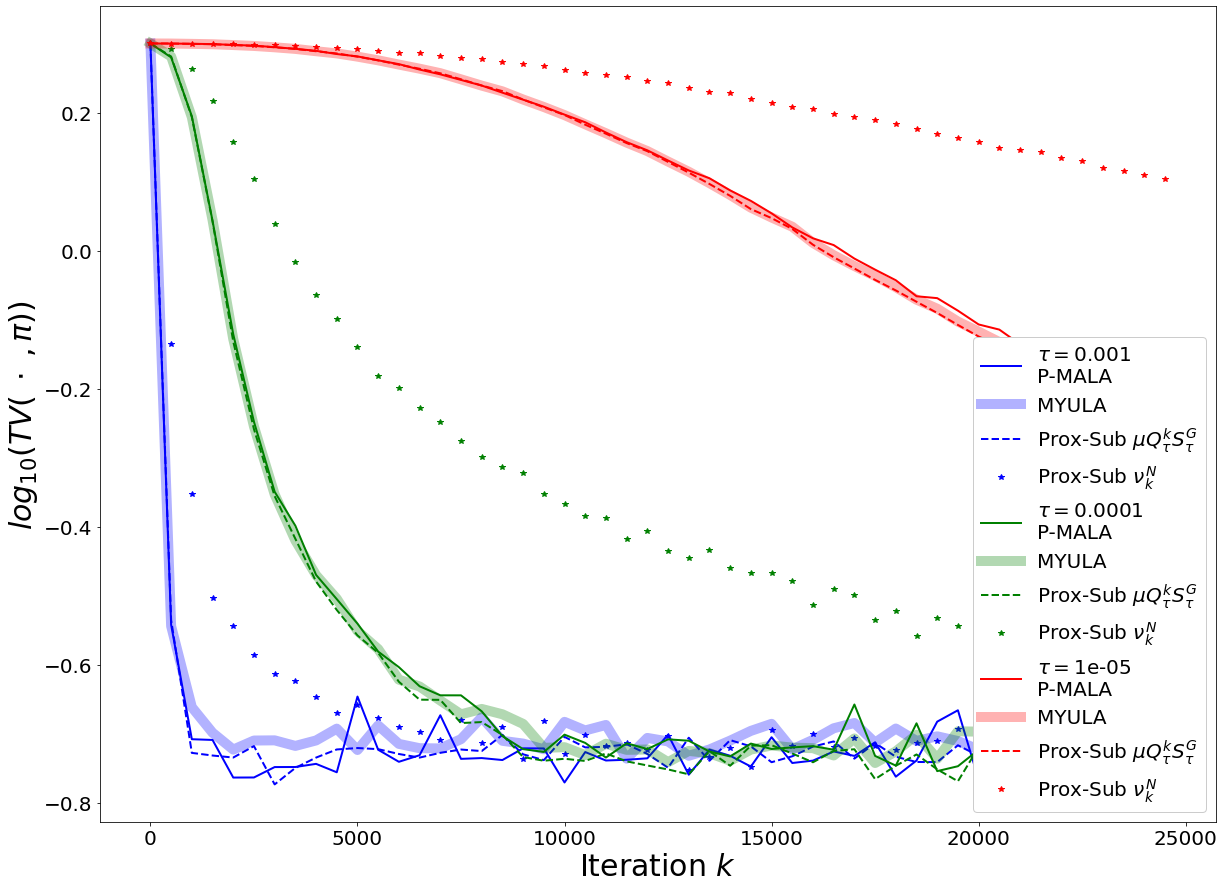

In [420]:
f = plt.figure(figsize=(20,15))
show_n = 50
x_axis=np.arange(stop=show_n*step,step=step)

c = ['b', 'g','r' , 'k']


for tau_num,tau in enumerate(tau_list):
    plt.plot(x_axis,np.log10((TV[1,tau_num,:show_n])),c[tau_num]+'-',linewidth=2,label=r'$\tau =$'+str(tau)+'\n'+'P-MALA')
    plt.plot(x_axis,np.log10((TV[0,tau_num,:show_n])),c[tau_num]+'-',alpha = 0.3,linewidth=10,label='MYULA')
    plt.plot(x_axis,np.log10((TV[2,tau_num,:show_n])),c[tau_num]+'--',linewidth=2,label=r'Prox-Sub $\mu Q^k_\tau S_\tau^G$')
    plt.plot(x_axis,np.log10((TV[3,tau_num,:show_n])),c[tau_num]+'*',linewidth=2,label=r'Prox-Sub $\nu_k^N$')
    
    
    
matplotlib.rcParams.update({'font.size': 20})
plt.xlabel('Iteration $k$',fontsize=30)
plt.ylabel(r'$log_{10} (TV(\;\cdot\;,\pi))$',fontsize=30)
plt.legend(loc='lower right',framealpha=1)
plt.savefig('results/images_paper/TV_convergence_rates_2d_diff_MYULA_MALA.png')

## Compare computation times

In [304]:
times_MALA = np.load('results/2d_ex/l2/MALA/reg_par_5_data_par_1.0_tau_1e-05_computation_times.npy')
times_MYULA = np.load('results/2d_ex/l2/MYULA/reg_par_5_data_par_1.0_tau_1e-05_computation_times.npy')
times_grad = np.load('results/2d_ex/l2/grad_subgrad/reg_par_5_data_par_1.0_tau_1e-05_computation_times.npy')
print("{:.2f}".format(np.mean(times_MALA[:40])))
print("{:.2f}".format(np.mean(times_MYULA[:40])))
print("{:.2f}".format(np.mean(times_grad[:40])))

times_MALA = np.load('results/2d_ex/l2/MALA/reg_par_5_data_par_1.0_tau_0.0001_computation_times.npy')
times_MYULA = np.load('results/2d_ex/l2/MYULA/reg_par_5_data_par_1.0_tau_0.0001_computation_times.npy')
times_grad = np.load('results/2d_ex/l2/grad_subgrad/reg_par_5_data_par_1.0_tau_0.0001_computation_times.npy')
print("{:.2f}".format(np.mean(times_MALA[:40])))
print("{:.2f}".format(np.mean(times_MYULA[:40])))
print("{:.2f}".format(np.mean(times_grad[:40])))

times_MALA = np.load('results/2d_ex/l2/MALA/reg_par_5_data_par_1.0_tau_0.001_computation_times.npy')
times_MYULA = np.load('results/2d_ex/l2/MYULA/reg_par_5_data_par_1.0_tau_0.001_computation_times.npy')
times_grad = np.load('results/2d_ex/l2/grad_subgrad/reg_par_5_data_par_1.0_tau_0.001_computation_times.npy')
print("{:.2f}".format(np.mean(times_MALA[:40])))
print("{:.2f}".format(np.mean(times_MYULA[:40])))
print("{:.2f}".format(np.mean(times_grad[:40])))

2.11
21.83
0.59
4.85
23.46
0.61
35.59
23.61
0.61


### Comparison MYULA different values of lambda

In [190]:
TV = np.zeros([3,len(tau_list),num+1])
try:
    TV=np.load('results/2d_ex/TV_errorsdd_TV_l2.npy')
except:
    for i in tqdm(range(num+1)):
        for tau_num,tau in enumerate(tau_list):
            
            x = np.load('results/2d_ex/l2/MYULA/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)
            
            TV[0,tau_num,i] = np.sum(np.abs(hist-hist1))
            
            
            x = np.load('results/2d_ex/l2/MYULA/reg_par_5_data_par_1.0_ld_0.1_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            TV[1,tau_num,i] = np.sum(np.abs(hist-hist1))
            
            x = np.load('results/2d_ex/l2/MYULA/reg_par_5_data_par_1.0_ld_0.01_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            TV[2,tau_num,i] = np.sum(np.abs(hist-hist1))           

            

    np.save('results/2d_ex/TV_convergence_rates_2d_MYULA_Moreau_param.npy',TV)
        


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 121.33it/s]


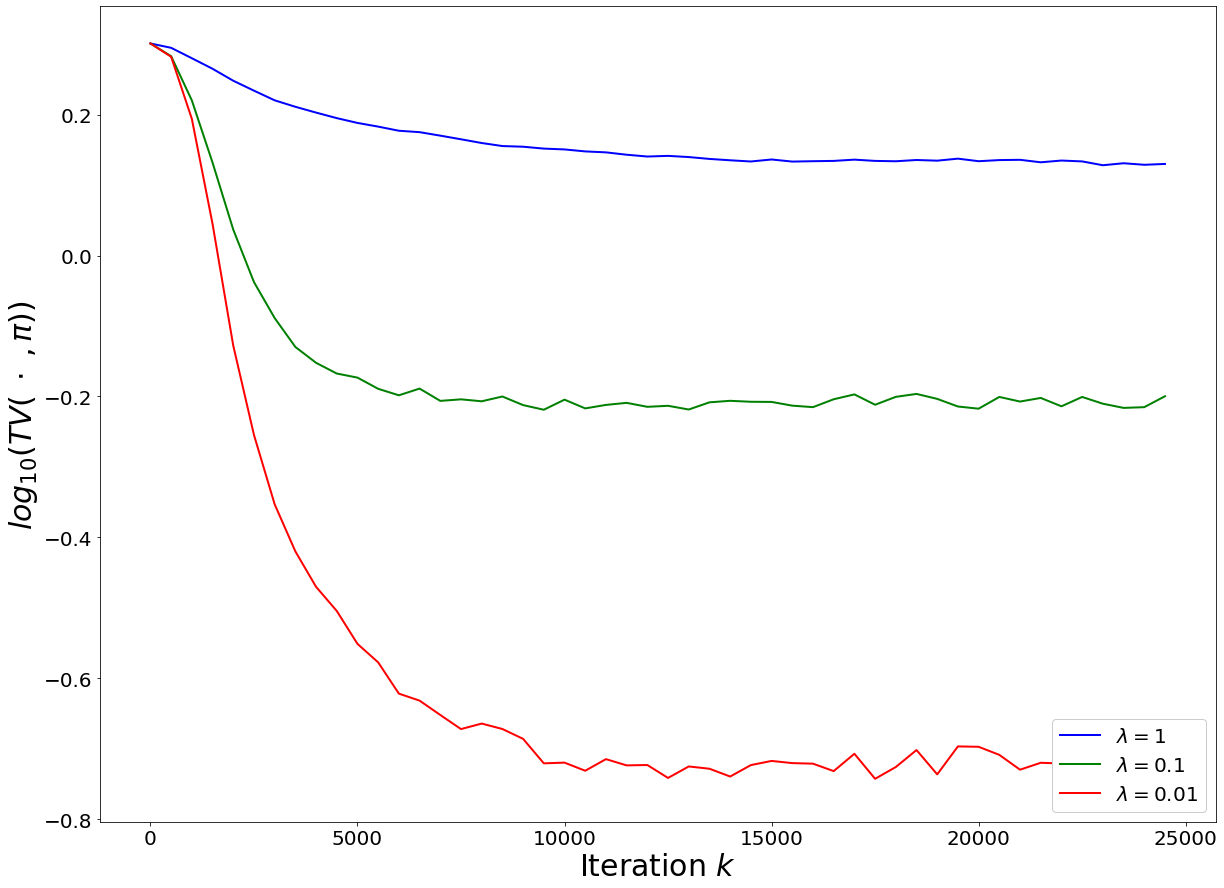

In [192]:
f = plt.figure(figsize=(20,15))
show_n = 50
x_axis=np.arange(stop=show_n*step,step=step)

c = ['b', 'g','r' , 'k']

tau=1e-4
tau_num = 1
plt.plot(x_axis,np.log10((TV[0,tau_num,:show_n])),c[0]+'-',linewidth=2,label=r'$\lambda=1$')
plt.plot(x_axis,np.log10((TV[1,tau_num,:show_n])),c[1]+'-',linewidth=2,label=r'$\lambda=0.1$')
plt.plot(x_axis,np.log10((TV[2,tau_num,:show_n])),c[2]+'-',linewidth=2,label=r'$\lambda=0.01$')
    
    
    
matplotlib.rcParams.update({'font.size': 20})
plt.xlabel('Iteration $k$',fontsize=30)
plt.ylabel(r'$log_{10} (TV(\;\cdot\;,\pi))$',fontsize=30)
plt.legend(loc='lower right',framealpha=1)
plt.savefig('results/images_paper/TV_convergence_rates_2d_MYULA_Moreau_param.png')

### KL convergence

In [193]:
KL = np.zeros([2,len(tau_list),num+1])
try:
    KL=np.load('results/2d_ex/KL_errorsdd_TV_l2.npy')
except:
    for i in tqdm(range(num+1)):
        for tau_num,tau in enumerate(tau_list):
            x = np.load('results/2d_ex/l2/grad_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'average_distribution.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            integrand = np.zeros(hist.shape)
            for k in range(integrand.shape[0]):
                for l in range(integrand.shape[1]):
                    if hist1[k,l]<1e-8:
                        integrand[k,l] = 0
                    elif hist[k,l]<1e-8:
                        integrand[k,l] = 0
                    else:
                        integrand[k,l] = hist[k,l]*np.log(hist[k,l]/hist1[k,l])

            KL[0,tau_num,i] = np.sum(integrand)
            
            
            
            
            x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'average_distribution.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            integrand = np.zeros(hist.shape)
            for k in range(integrand.shape[0]):
                for l in range(integrand.shape[1]):
                    if hist1[k,l]<1e-8:
                        integrand[k,l] = 0
                    elif hist[k,l]<1e-8:
                        integrand[k,l] = 0
                    else:
                        integrand[k,l] = hist[k,l]*np.log(hist[k,l]/hist1[k,l])

            KL[1,tau_num,i] = np.sum(integrand)

    np.save('results/2d_ex/KL_errors_TV_l2.npy',KL)
        


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 27.78it/s]


In [194]:
rate_lim = np.zeros(2)
rate = np.zeros([len(tau_list),num+1])

for run,tau in enumerate(tau_list):
    x = np.load('results/2d_ex/l2/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+'_iter_0.npy')
    x = x[:,:n]
    a = np.ones((n,)) / n
    M = ot.dist(np.transpose(x), np.transpose(gt1))
    w2_0 = ot.emd2(a, b, M,numItermax=1e6)
    rate[run,:] = w2_0/(2*tau*np.array(range(1,(num+1)*step+1,step))) + d*tau*L_F+0.5*tau*L_G**2*K_nrm**2
    
rate_lim = np.zeros([len(tau_list)])
for tau_num,tau in enumerate(tau_list):
    rate_lim[tau_num] = d*tau*L_F+0.5*tau*L_G**2*K_nrm**2

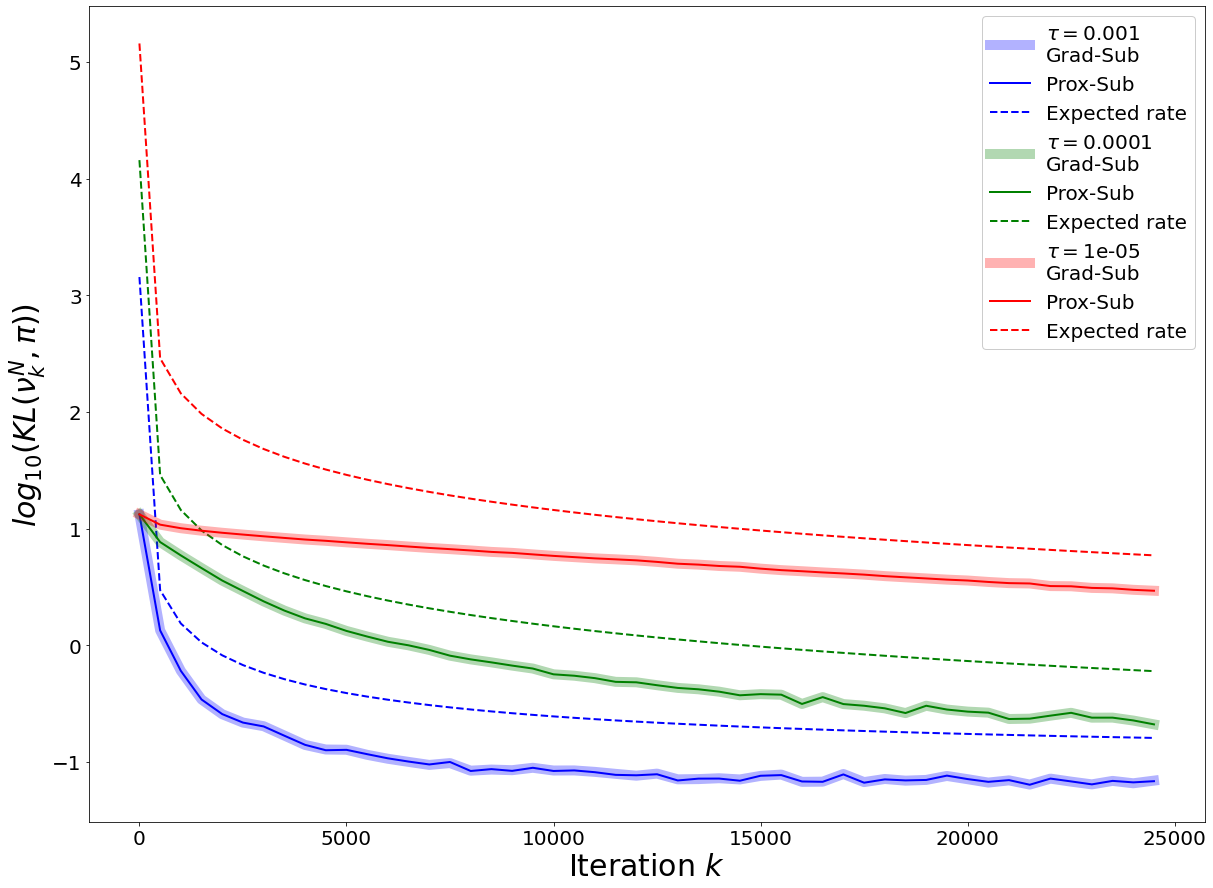

In [195]:
f = plt.figure(figsize=(20,15))
x_axis=np.arange(stop=show_n*step,step=step)


for tau_num,tau in enumerate(tau_list):
    plt.plot(x_axis,np.log10((KL[0,tau_num,:show_n])),c[tau_num]+'-',alpha = 0.3,linewidth=10,label=r'$\tau =$'+str(tau)+'\n'+'Grad-Sub')
    plt.plot(x_axis,np.log10((KL[1,tau_num,:show_n])),c[tau_num]+'-',linewidth=2,label='Prox-Sub')
    plt.plot(x_axis,np.log10(rate[tau_num,:show_n]),c[tau_num]+'--',linewidth=2,label='Expected rate')
    
matplotlib.rcParams.update({'font.size': 20})
plt.xlabel('Iteration $k$',fontsize=30)
plt.ylabel(r'$log_{10}(KL(\nu_k^N,\pi))$',fontsize=30)
plt.legend(loc='upper right',framealpha=1)
plt.savefig('results/images_paper/KL_convergence_rates_2d_diff.png')

# TV l1 denoising

In [196]:
d = 2
sigma = 1
reg_par = 5
data_par = 1/(sigma**2)
m = data_par
L_F = data_par*np.sqrt(d)
L_G = reg_par*np.sqrt(d)
K_nrm = 2
y1=-1
y2=1

f = lambda x1,x2: np.exp(-data_par*(np.abs(x1-y1)+np.abs(x2-y2))/(sigma**2) - reg_par*(np.abs(x1-x2)))

Z = scipy.integrate.dblquad(f, -5, 5, -5, 5)[0]
density = lambda x1,x2: f(x1,x2)/Z



/home/habring/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [197]:
num_bins = 100
bins1_x = np.linspace(-5,5,num_bins+1)
bins1_y = np.linspace(-5,5,num_bins+1)
dx1 = bins1_x[1:]-bins1_x[:-1]
dy1 = bins1_y[1:]-bins1_y[:-1]

for i in tqdm(range(num_bins)):
    for j in (range(num_bins)):
        gt[i,j] = scipy.integrate.dblquad(density, bins1_x[i], bins1_x[i+1], bins1_y[j], bins1_y[j+1])[0]
        
hist1 = np.copy(gt)
hist1 /= np.sum(hist1)

gt1 = np.zeros([2,num_bins**2])
b_2d = np.zeros([num_bins,num_bins])
b = np.zeros(num_bins**2)

for i in range(num_bins):
    for j in range(num_bins):
        gt1[1,i*num_bins+j] = (bins1_x[i]+bins1_x[i+1])/2
        gt1[0,i*num_bins+j] = (bins1_y[j]+bins1_y[j+1])/2
        b[i*num_bins+j] = hist1[i,j]
        

100%|█████████████████████████████████████████| 100/100 [00:20<00:00,  4.96it/s]


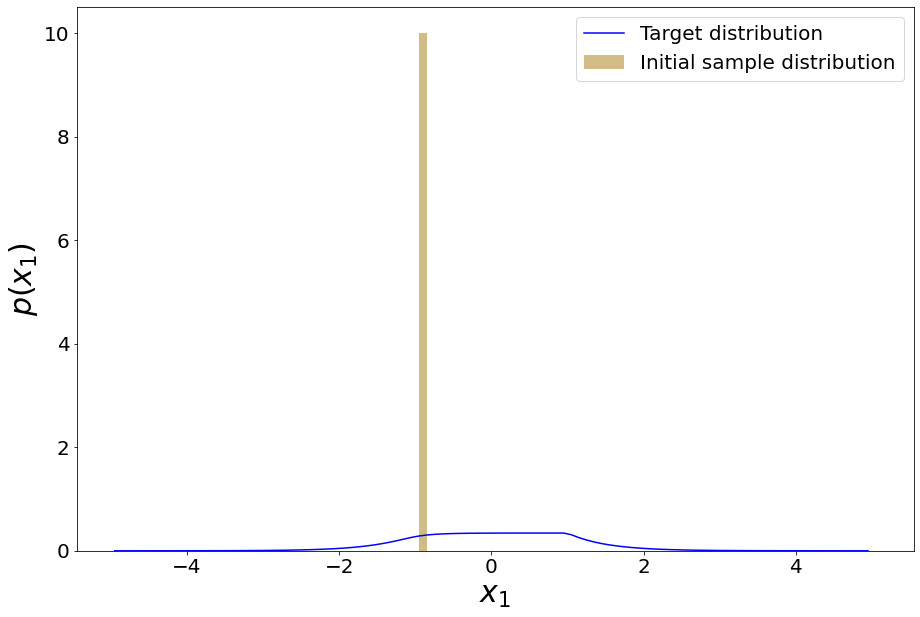

In [198]:
fig = plt.figure(figsize=(15,10))
x = np.load('results/2d_ex/l1/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(1e-3)+
                        '_iter_'+str(0)+'average_distribution.npy')

hist = np.histogram(x[0,:], bins=bins1_x, density=True)[0]

plt.bar(bins1_x[1:],hist,width = dx1,color=(209/255,188/255,133/255),label='Initial sample distribution')
plt.plot((bins1_x[1:]+bins1_x[:-1])/2,np.sum(hist1,axis=1)/dx1[0],'b',label = 'Target distribution')

matplotlib.rcParams.update({'font.size': 20})
plt.xlabel(r'$x_1$',fontsize=30)
plt.ylabel(r'$p(x_1)$',fontsize=30)
plt.legend()
plt.savefig('results/images_paper/initial_distribution_TV_L1.png')

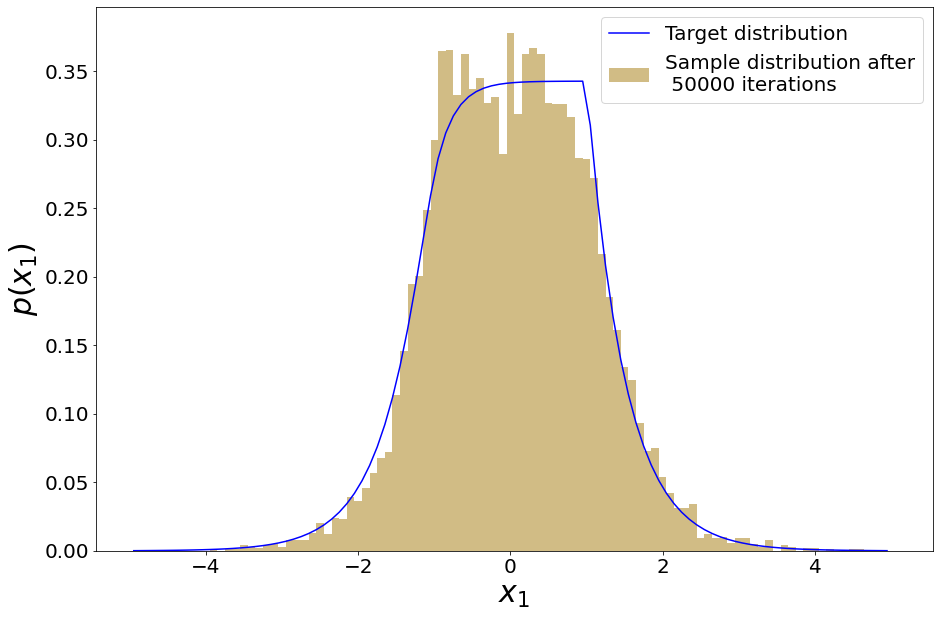

In [199]:
fig = plt.figure(figsize=(15,10))
x = np.load('results/2d_ex/l1/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(1e-3)+
                        '_iter_'+str(49500)+'average_distribution.npy')

hist = np.histogram(x[0,:], bins=bins1_x, density=True)[0]

plt.bar(bins1_x[1:], hist,width = dx1,color=(209/255,188/255,133/255),label='Sample distribution after'+'\n'+' 50000 iterations')
plt.plot((bins1_x[1:]+bins1_x[:-1])/2, np.sum(hist1,axis=1)/dx1,'b',label = 'Target distribution')

matplotlib.rcParams.update({'font.size': 20})
plt.xlabel(r'$x_1$',fontsize=30)
plt.ylabel(r'$p(x_1)$',fontsize=30)
plt.legend()
plt.savefig('results/images_paper/reached_distribution_TV_L1.png')

In [58]:
tau_list = [1e-3,1e-4,1e-5]
KL = np.zeros([2,len(tau_list),num+1])
try:
    KL=np.load('results/2d_ex/KL_errorse_-TV_l1.npy')
except:
    for i in tqdm(range(num+1)):
        for tau_num,tau in enumerate(tau_list):
            x = np.load('results/2d_ex/l1/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'average_distribution.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            integrand = np.zeros(hist.shape)
            for k in range(integrand.shape[0]):
                for l in range(integrand.shape[1]):
                    if hist1[k,l]<1e-8:
                        integrand[k,l] = 0
                    elif hist[k,l]<1e-8:
                        integrand[k,l] = 0
                    else:
                        integrand[k,l] = hist[k,l]*np.log(hist[k,l]/hist1[k,l])

            KL[0,tau_num,i] = np.sum(integrand)
            
            
            
            
            x = np.load('results/2d_ex/l1/subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+
                        '_iter_'+str(i*step)+'average_distribution.npy')
            hist = np.histogram2d(x[1,:],x[0,:], bins=(bins1_x,bins1_y), density=True)[0]
            hist = hist*np.outer(dx1,dy1)

            integrand = np.zeros(hist.shape)
            for k in range(integrand.shape[0]):
                for l in range(integrand.shape[1]):
                    if hist1[k,l]<1e-8:
                        integrand[k,l] = 0
                    elif hist[k,l]<1e-8:
                        integrand[k,l] = 0
                    else:
                        integrand[k,l] = hist[k,l]*np.log(hist[k,l]/hist1[k,l])

            KL[1,tau_num,i] = np.sum(integrand)

    np.save('results/2d_ex/KL_errors_TV_l1.npy',KL)
        


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 25.95it/s]


In [59]:
rate_lim = np.zeros(2)
rate = np.zeros([2,len(tau_list),num+1])

for run,tau in enumerate(tau_list):
    x = np.load('results/2d_ex/l1/prox_subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+'_iter_0.npy')
    x = x[:,:n]
    a = np.ones((n,)) / n
    M = ot.dist(np.transpose(x), np.transpose(gt1))
    w2_0 = ot.emd2(a, b, M,numItermax=1e6)
    rate[0,run,:] = w2_0/(2*tau*np.array(range(1,(num+1)*step+1,step))) + np.sqrt(2*d*tau)*L_F+0.5*tau*L_G**2*K_nrm**2
    
    x = np.load('results/2d_ex/l1/subgrad/reg_par_5_data_par_1.0_tau_'+str(tau)+'_iter_0.npy')
    x = x[:,:n]
    a = np.ones((n,)) / n
    M = ot.dist(np.transpose(x), np.transpose(gt1))
    w2_0 = ot.emd2(a, b, M,numItermax=1e6)
    rate[1,run,:] = w2_0/(2*tau*np.array(range(1,(num+1)*step+1,step))) + 0.5*tau*(L_F+K_nrm*L_G)**2


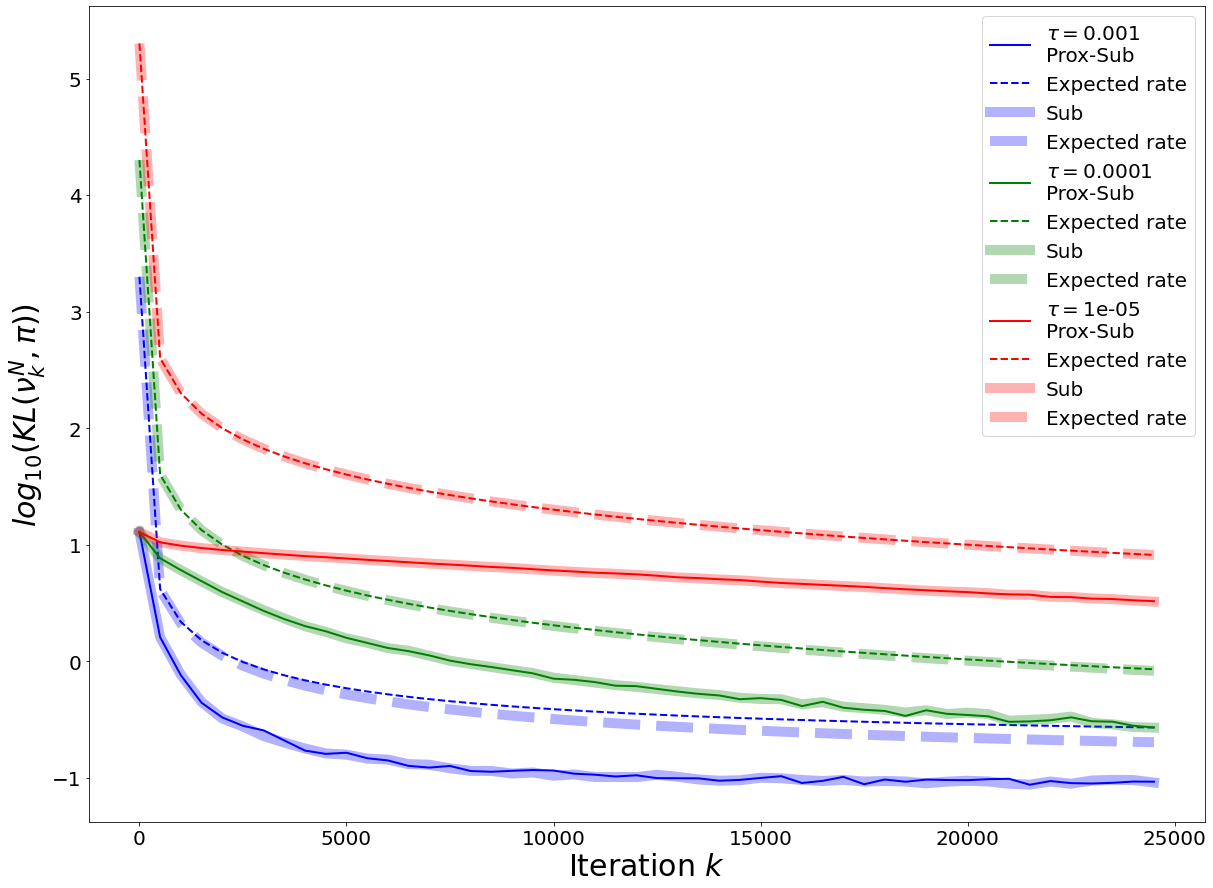

In [60]:
show_n=50
f = plt.figure(figsize=(20,15))
x_axis=np.arange(stop=show_n*step,step=step)
c = ['b', 'g','r' , 'k']

for tau_num,tau in enumerate(tau_list):
    plt.plot(x_axis,np.log10((KL[0,tau_num,:show_n])),c[tau_num]+'-',linewidth=2,label=r'$\tau =$'+str(tau)+'\n'+'Prox-Sub')
    plt.plot(x_axis,np.log10(rate[0,tau_num,:show_n]),c[tau_num]+'--', linewidth=2,label='Expected rate')
    
    plt.plot(x_axis,np.log10((KL[1,tau_num,:show_n])),c[tau_num]+'-',alpha = 0.3,linewidth=10,label='Sub')
    plt.plot(x_axis,np.log10(rate[1,tau_num,:show_n]),c[tau_num]+'--',alpha = 0.3,linewidth=10,label='Expected rate')
    #plt.hlines(np.log10(rate_lim[tau_num]),x_axis[0],x_axis[-1],color = c[tau_num],linestyles = 'dashed')
    
matplotlib.rcParams.update({'font.size': 20})
plt.xlabel('Iteration $k$',fontsize=30)
plt.ylabel(r'$log_{10}(KL(\nu_k^N,\pi))$',fontsize=30)
plt.legend()
plt.savefig('results/images_paper/KL_convergence_rates_2d_l1.png')